<a href="https://colab.research.google.com/github/TuSh2730/ml-project-/blob/main/mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files
uploaded = files.upload()
 # To display the first few rows


Saving archive (4).csv to archive (4) (2).csv


First 5 rows of data:
   UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  

Dataset Info:
<class 

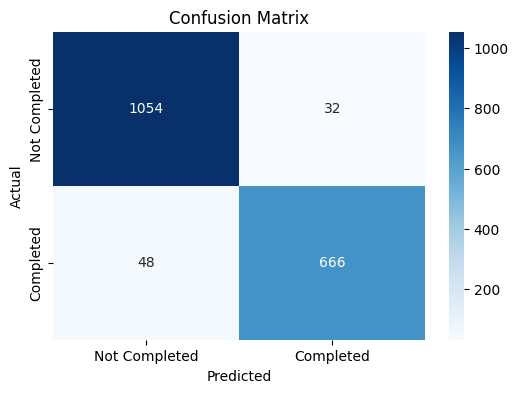

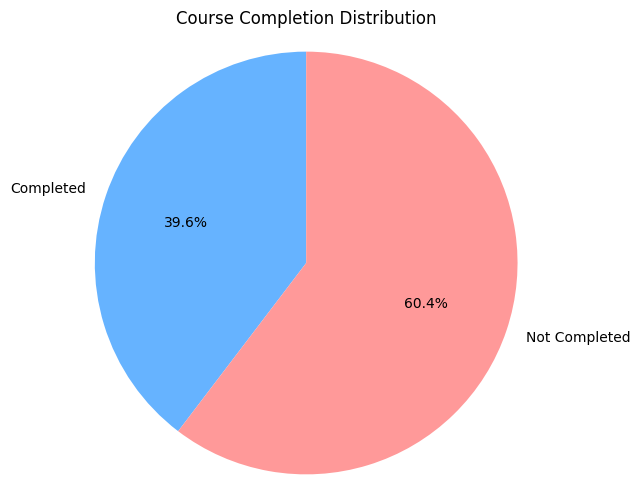

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# ✅ Load dataset from Desktop
df = pd.read_csv("archive (4).csv")


# ✅ Inspect the dataset
print("First 5 rows of data:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# ✅ Define features and target
features = ['CourseCategory', 'DeviceType', 'TimeSpentOnCourse',
            'NumberOfVideosWatched', 'NumberOfQuizzesTaken',
            'QuizScores', 'CompletionRate']
target = 'CourseCompletion'

# ✅ Drop missing values
df = df.dropna()

# ✅ Identify categorical and numerical columns
categorical_features = ['CourseCategory', 'DeviceType']
numerical_features = ['TimeSpentOnCourse', 'NumberOfVideosWatched',
                      'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']

# ✅ Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ✅ Split into features (X) and target (y)
X = df[features]
y = df[target]

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Preprocessing
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_features),
        ('cat', cat_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# ✅ Apply transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# ✅ Train Random Forest model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# ✅ Predictions
y_pred = model.predict(X_test)

# ✅ Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Pie Chart of Completion Distribution
completion_counts = df['CourseCompletion'].value_counts()
labels = ['Completed', 'Not Completed'] if 1 in completion_counts.index else ['Not Completed', 'Completed']
sizes = [completion_counts.get(1, 0), completion_counts.get(0, 0)]

plt.figure(figsize=(6, 6))
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Course Completion Distribution")
plt.axis('equal')
plt.show()




Model: Logistic Regression
Accuracy: 0.7916666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1068
           1       0.76      0.70      0.73       732

    accuracy                           0.79      1800
   macro avg       0.79      0.78      0.78      1800
weighted avg       0.79      0.79      0.79      1800

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9561111111111111
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1068
           1       0.97      0.92      0.94       732

    accuracy                           0.96      1800
   macro avg       0.96      0.95      0.95      1800
weighted avg       0.96      0.96      0.96      1800

--------------------------------------------------


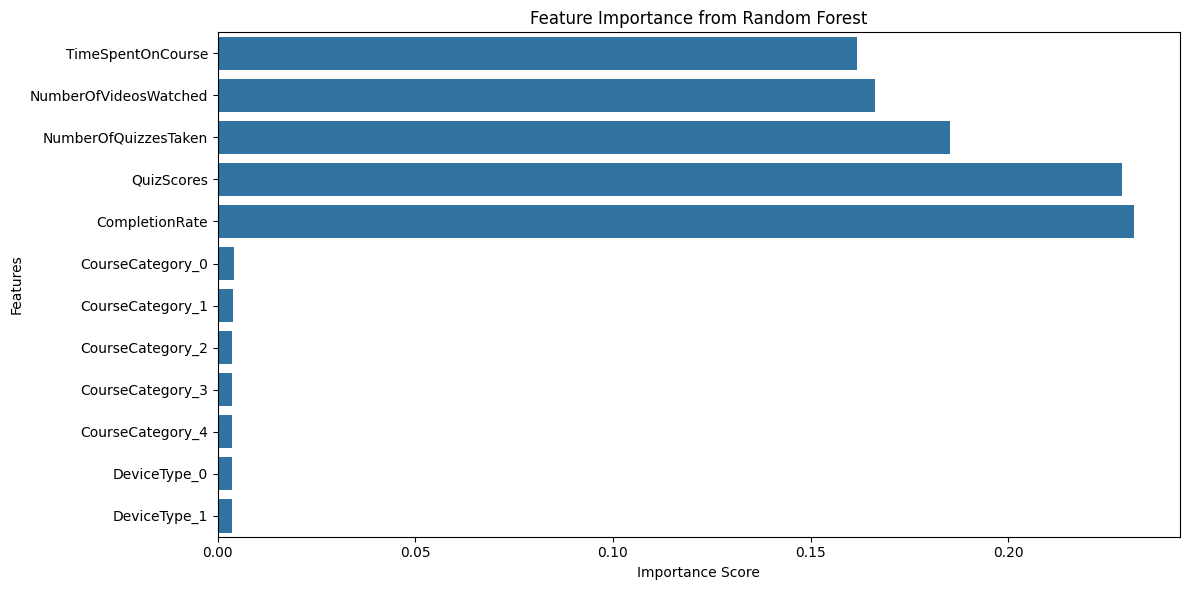

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
  # Change this path if needed
df = pd.read_csv("archive (4).csv")

# Drop missing values
df = df.dropna()

# Define features
categorical_features = ['CourseCategory', 'DeviceType']
numerical_features = ['TimeSpentOnCourse', 'NumberOfVideosWatched',
                      'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']
target = 'CourseCompletion'

# Label encoding for categorical features (for feature importance later)
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting features and target
X = df[categorical_features + numerical_features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing pipeline
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

# Feature importance (only for Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(preprocessor.fit_transform(X_train), y_train)

# Get feature names after encoding
cat_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_names = numerical_features + cat_feature_names

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_model.feature_importances_, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
